In [1]:
import scycle as cc
import scanpy as sc
import numpy as np

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)

In [2]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_9 = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.prep_pooling(adata_9, filter_cells=True, max_counts=50000)
cc.tl.dimensionality_reduction(adata_9, method="ica")
cc.tl.enrich_components(adata_9, verbose=True)

Preparing embedding...
3862 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3806
Embedding for pooling...
Pooling 3806 samples...
-- Dimensionality reduction using ICA...
FastICA from sklearn did not converge due to numerical instabilities - Retrying...
-- Done
G1/S  score: 7.222236
G2/M+ score: 9.955297
G2/M- score: 6.142967
HIST  score: 17.318246
--- Selected components:
G1/S: 1 (score=7.222236)
G2/M: 10 (score=9.955297)
G2/M-: 12 (score=6.142967)
Histones: 2 (score=17.318246)


In [12]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_10 = sc.read_h5ad(DATA_PATH + 'CHLA10.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.prep_pooling(adata_10, filter_cells=True, max_counts=50000)
cc.tl.dimensionality_reduction(adata_10, method="ica")
cc.tl.enrich_components(adata_10, verbose=True)

Preparing embedding...
3476 samples pass the count filter
4534  samples pass the mt filter
Samples selected 3464
Embedding for pooling...
Pooling 3464 samples...
-- Dimensionality reduction using ICA...
FastICA from sklearn did not converge due to numerical instabilities - Retrying...
-- Done
G1/S  score: 8.092460
G2/M+ score: 10.496061
G2/M- score: 9.371653
HIST  score: 16.757247
--- Selected components:
G1/S: 1 (score=8.092460)
G2/M: 2 (score=10.496061)
G2/M-: 6 (score=9.371653)
Histones: 3 (score=16.757247)


In [13]:
cc.tl.principal_circle(adata_9)
cc.tl.celldiv_moment(adata_9)
cc.tl.remap_nodes(adata_9)
cc.tl.pseudotime(adata_9)
cc.tl.curvature(adata_9)

Suggested moment of cell division: [7 8]
Direction of cell cycle: 1
Remapping edges using [7 8] ...
Calculating pseudotimes for each cell...


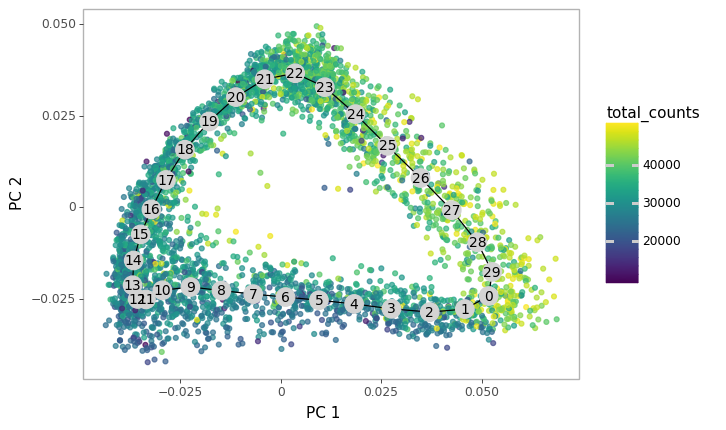

<ggplot: (8781288204532)>

In [14]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [15]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [24 25]
Direction of cell cycle: -1
Remapping edges using [24 25] ...
Calculating pseudotimes for each cell...


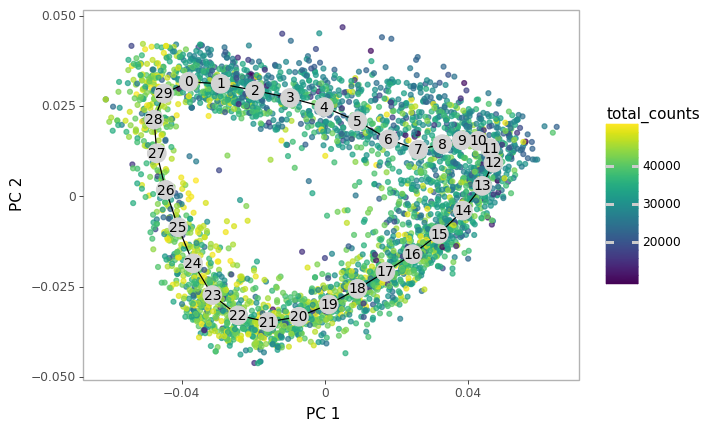

<ggplot: (8781288537549)>

In [16]:
cc.pl.scatter_projection(adata_10, trajectory=True)

In [17]:
cc.tl.integration(adata_10, adata_9, verbose=True, algorithm='woti', 
                  scale_src=0.03, scale_ref=0.03)

-- Automatically detecting cell-cycle components...
-- Integrating datasets...
> Selecting common genes...
> 9227 genes selected.
> Slicing matrices...
> Performing optimal transport based integration using WOTi...
WOTi > Computing source distribution weights...
WOTi > Computing reference distribution weights...
WOTi > Computing optimal transport plan...
WOTi > Projecting source dataset...
-- Done


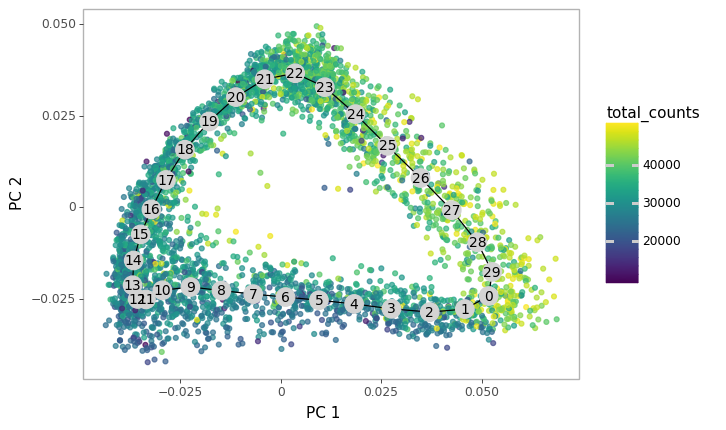

<ggplot: (8781633338540)>

In [18]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [19]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [17 18]
Direction of cell cycle: 1
Remapping edges using [17 18] ...
Calculating pseudotimes for each cell...


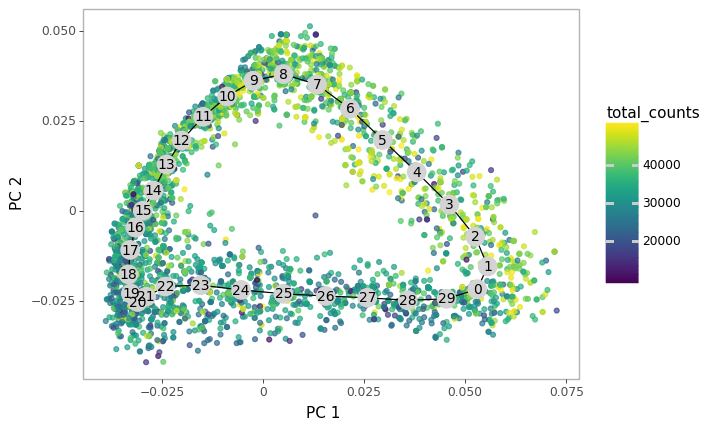

<ggplot: (8781304188618)>

In [20]:
cc.pl.scatter_projection(adata_10, trajectory=True)

In [ ]:
adata_10